In [1]:
#WASTE MANAGEMENT USING CNN  MODEL


In [6]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install sequential

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [13]:
pip install cvtColor

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cvtColor (from versions: none)
ERROR: No matching distribution found for cvtColor


In [14]:
pip install opencv-python

In [15]:
pip install glob

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [16]:
pip install category

Note: you may need to restart the kernel to use updated packages.


In [17]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [18]:
train_path="dataset/TRAIN"
test_path="dataset/TEST"


In [19]:
#Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization,input_shape
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [44]:
#visualization
from cv2 import cvtColor
x_data= [] 
y_data= []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})


100%|██████████| 9999/9999 [00:04<00:00, 2168.17it/s]


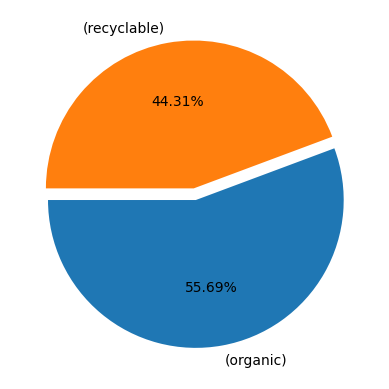

In [45]:
color=['#aoe3d5','#6e56ce']
plt.pie(data.label.value_counts(),labels=['(organic)','(recyclable)'],autopct='%0.2f%%',startangle=180,explode=[0.04,0.04])
plt.show()

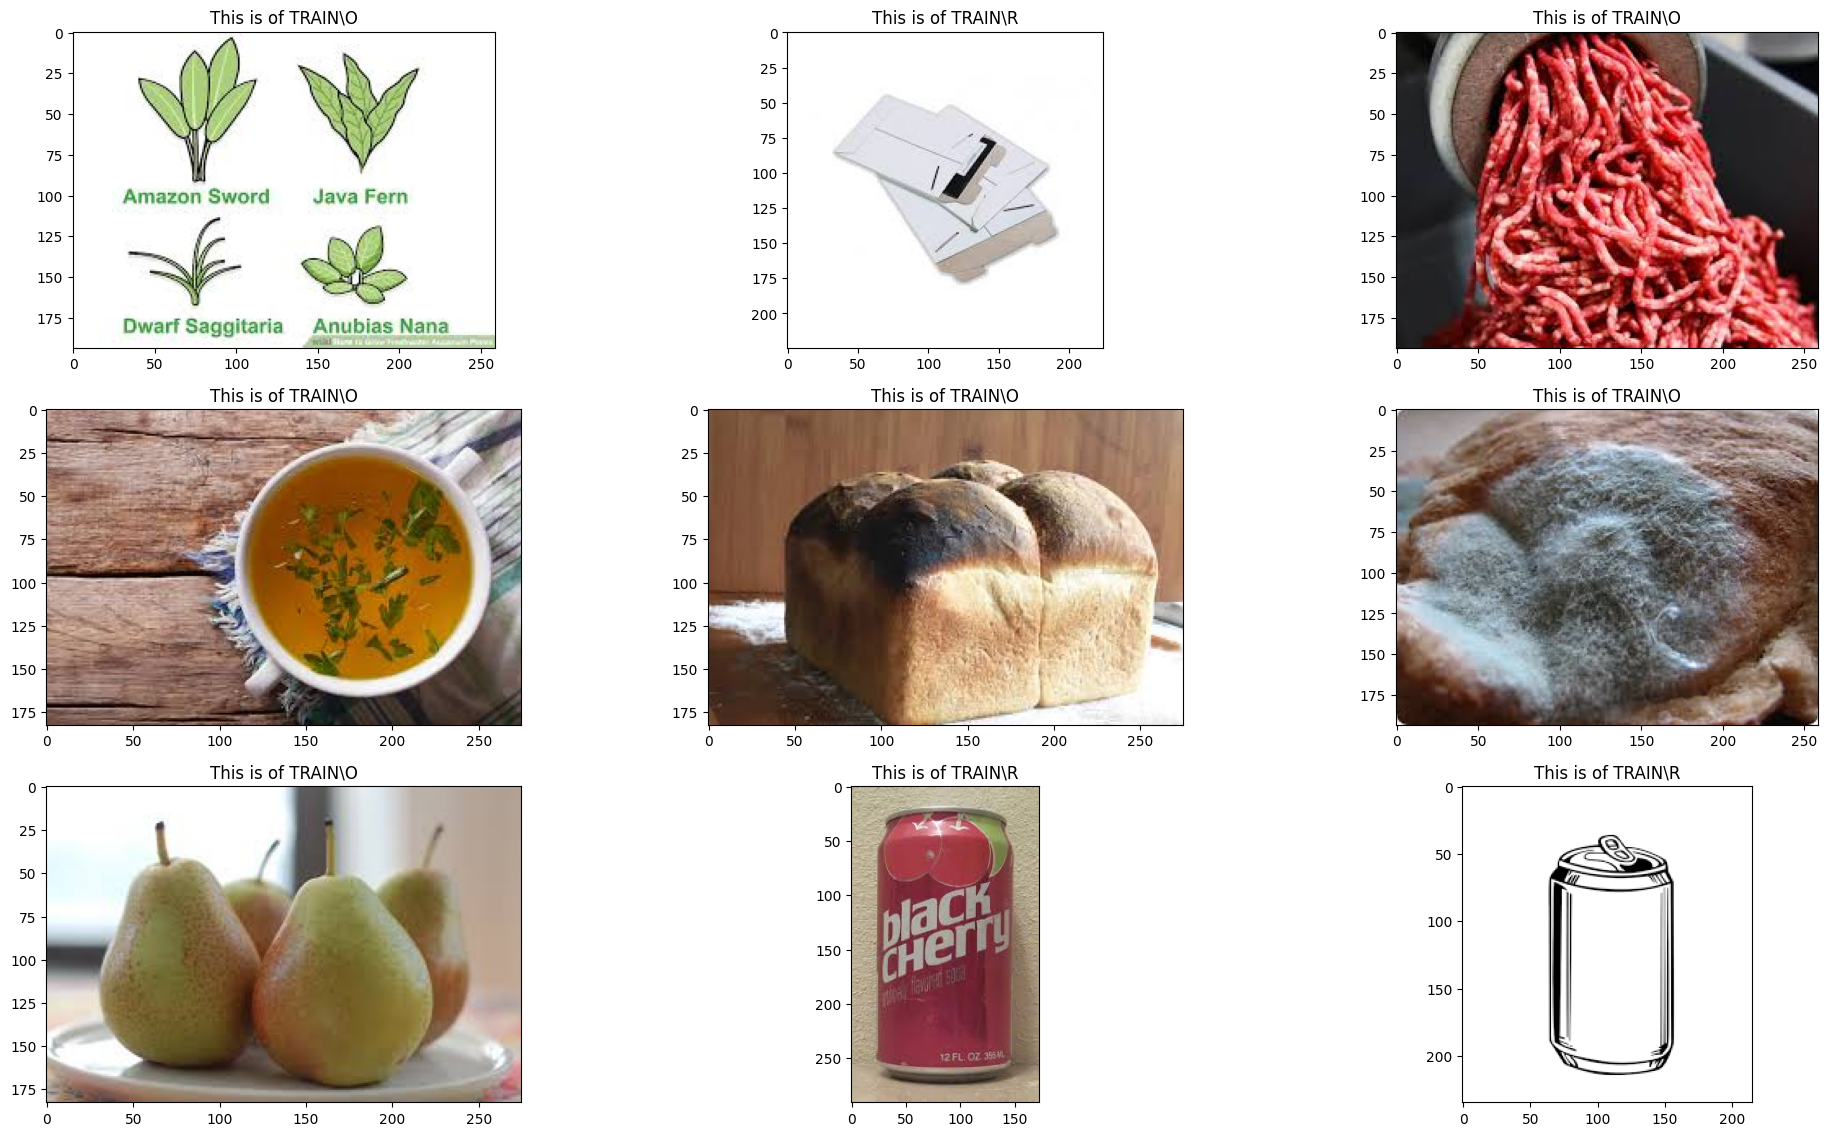

In [46]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [47]:
pip install compile

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install input_shape

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement input_shape (from versions: none)
ERROR: No matching distribution found for input_shape


In [64]:


model = Sequential()

# First Conv2D layer with input_shape defined
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))  
model.add(Activation('relu'))
model.add(MaxPooling2D())

# Second Conv2D layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

# Third Conv2D layer
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

# Flatten layer before Dense layers
model.add(Flatten())

# Fully connected Dense layers
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer (2 classes for binary classification)
model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 256


In [59]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [61]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [65]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [63]:
hist = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 465s 5s/step - accuracy: 0.7333 - loss: 0.5654 - val_accuracy: 0.8464 - val_loss: 0.3694
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 303s 3s/step - accuracy: 0.8340 - loss: 0.4030 - val_accuracy: 0.8790 - val_loss: 0.3075
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 369s 4s/step - accuracy: 0.8526 - loss: 0.3631 - val_accuracy: 0.8540 - val_loss: 0.3367
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 321s 4s/step - accuracy: 0.8665 - loss: 0.3294 - val_accuracy: 0.8965 - val_loss: 0.2652
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 320s 4s/step - accuracy: 0.8776 - loss: 0.3066 - val_accuracy: 0.9049 - val_loss: 0.2560
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 323s 4s/step - accuracy: 0.8955 - loss: 0.2788 - val_accuracy: 0.9093 - val_loss: 0.2642
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 343s 4s/step - accuracy: 0.9013 - loss: 0.2527 - val_accuracy: 0.8965 - val_loss: 0.2994
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 296s 3s/step - accuracy: 0.9184 - loss: 0.2207 - val_accuracy: 0.9005 - v